# ANALISIS Y PROCESAMIENTO 

In [2]:
# Se importan las librerías que se utilizarán: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as stats

In [5]:
# Se importa el dataset final (CSV) y se visualiza
peliculas=pd.read_csv(r'peliculas.csv')
peliculas


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,plataforma
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113,"Comedy, Drama",A small fishing village must procure a local d...,amazon
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,amazon
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,amazon
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69,Documentary,"Pink breaks the mold once again, bringing her ...",amazon
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,amazon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15390,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,disney
15391,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,disney
15392,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",disney
15393,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,disney


In [6]:
# Se observa la cantidad de filas y columnas del dataframe
forma = peliculas.shape
f"El dataset tiene {forma[0]} filas y {forma[1]} columnas"

'El dataset tiene 15395 filas y 13 columnas'

In [7]:
# Se verifican si hay filas duplicadas
dupl = peliculas.duplicated()
print(dupl.value_counts())

False    15395
dtype: int64


No hay filas duplicadas

In [9]:
# Se observan los nombres de las columnas
print(peliculas.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'plataforma'],
      dtype='object')


In [10]:
# Se cambian  los nombres de las columnas para que estén en español y sean más intuitivos:
peliculas.columns = ['id', 'tipo', 'titulo', 'director', 'elenco', 
                  'pais', 'fecha_agregado', 'anio', 'calificacion', 'duracion', 
                 'listado_en', 'descripcion','plataforma']

In [11]:
# Se verifican que los nombres se hayan cambiado y además el tipo de dato de las mismas
print(peliculas.columns)

Index(['id', 'tipo', 'titulo', 'director', 'elenco', 'pais', 'fecha_agregado',
       'anio', 'calificacion', 'duracion', 'listado_en', 'descripcion',
       'plataforma'],
      dtype='object')


In [12]:
# Se observan cuántos valores faltantes tiene cada columna:
missing_values = peliculas.isnull().sum().sort_values(ascending = False) # contabiliza
        # datos faltantes ordenados de mayor a menor
        # según la columna
missing_values

pais              7904
fecha_agregado    7801
elenco            1429
director           889
calificacion       336
duracion             3
id                   0
tipo                 0
titulo               0
anio                 0
listado_en           0
descripcion          0
plataforma           0
dtype: int64

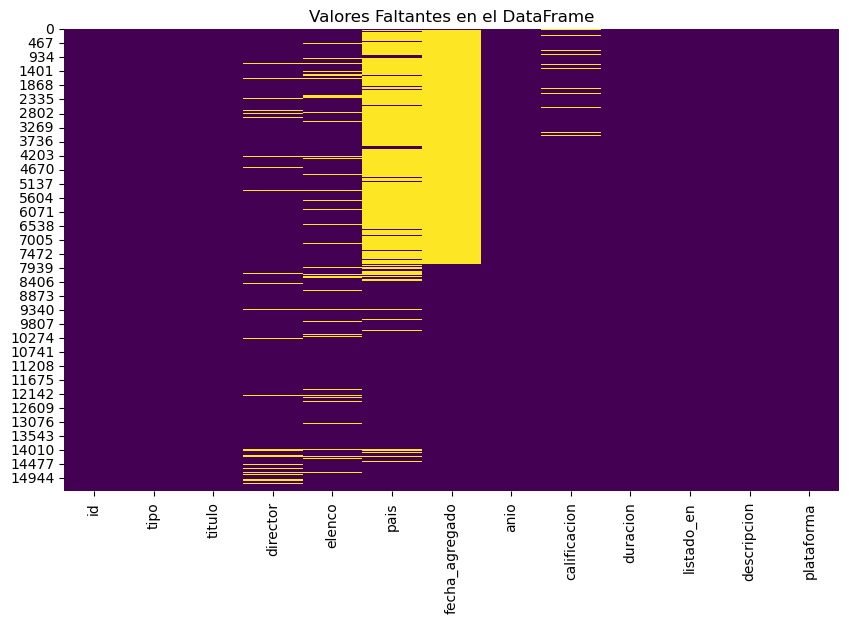

In [14]:
# visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(peliculas.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

In [15]:
#Se borran las columnas que no se utilizarán 
peliculas.drop(['fecha_agregado'],axis=1)

,id,tipo,titulo,director,elenco,pais,anio,calificacion,duracion,listado_en,descripcion,plataforma
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2014,NaN,113,"Comedy, Drama",A small fishing village must procure a local d...,amazon
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2018,13+,110,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,amazon
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2017,NaN,74,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,amazon
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2014,NaN,69,Documentary,"Pink breaks the mold once again, bringing her ...",amazon
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,1989,NaN,45,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,amazon
...,...,...,...,...,...,...,...,...,...,...,...,...
15390,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,disney
15391,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,disney
15392,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",disney
15393,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,disney


Se analizará posteriormente el tramaniento de la columna pais, que posee una cantidad significativa de valores nulos. 

In [16]:
#Se verifica que se haya borrado la columna
print(peliculas.columns)

Index(['id', 'tipo', 'titulo', 'director', 'elenco', 'pais', 'fecha_agregado',
       'anio', 'calificacion', 'duracion', 'listado_en', 'descripcion',
       'plataforma'],
      dtype='object')


FALTA QUE HAGAMOS: sacar los minutos del tiempo de duración, GRAFICAR, RESOLVER CON DUMMIES: GENERO, DIRECTOR Y ELENCO Y GRAFICAR.  

DE LOS README: FALTARÍA PONER LA FUENTE DE TODOS LOS SETS DE DATOS, 

DE LOS SETS DE DATOS FALTA, CONCATENARLOS, CREAR LA COLUMNA PLATAFORMA Y BORRAR LOS TV SHOWS, Y VER QUE TIPO DE DATOS CONTIENE CADA COLUMNA